# IS THERE A SEASONAL VARIATION IN RATINGS

## Is there a seasonal variation in the ratings of businesses? Comparing reviews to the average for that business, do users rate businesses higher or lower than the average in certain months?

### --> Teams Interpretation: 

<p> Our teams interpretation of the question above is as such: </p>
<ul>
<li> We need to find out if there is any variation in AVG Ratings by seasons or by months.</li>
<li> We will first look at all the businesses by state, and compute its yearly average per state </li>
<li> Then we will compute the monthly average of all the businesses by state, and compare that with the monthly average. This will show is in what month the ratings were higher and in what months were they lower compared to the yearly average of all the businesses in the same State. </li>
<li> We GROUP the businesses by STATE because there are approx 11 metropolitan areas in our data set, and grouping them by state would GROUP all the cities in the metropolitan areas, since those are the only cities we have.</li>
<li> We take a yearly average and NOT an overall AVG because every year the review count as well as the AVG Rating seems to be increasing.
<li> After we have compared and looked at the pattern of ratings in the same state for different years, we can predict if we have seasonal variation or not.</li>
<li> We decided to keep a monthly average and not combine the months into Seasons because we realized that weather in CA in DEC maybe a lot different than weather in Texas. </li>
<li> We can also implement a Category query, that pulls data only for businesses that are in a particular query. For example: Ice cream parlors, vacation rental places, golf courses.</li>
<li>The businesses listed above are all seasonal businesses (research done on Google for seasonal businesses). Therefore, we assume that there would be more of a trend in variation fo the ratings for these particular businesses. </li>
<li><em> NOTE: This progress report DOES NOT implement the category part of the queries yet.</em></li>
</ul>


### Loading the Yelp Business Data

In [2]:
# The code was removed by DSX for sharing.

### READING the Business Data and CREATING A VIEW named: "business_data"

In [3]:
path_business = bmos.url('Fall2017', 'business.json.gz')
df_business_data = spark.read.json(path_business)
df_business_data.createOrReplaceTempView("business_data")

### LOADING YELP Review data

In [4]:
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.
path_review = bmos.url('Fall2017', 'review.json.gz')

### READING the Business Data and CREATING A VIEW named: "business_data"

In [5]:
df_review_data = spark.read.json(path_review)
df_review_data.createOrReplaceTempView("review_data")

## Query 1:
### Here we give aliases, R = review_data, B = Business data
#### Created a VIEW: "avg_by_year"

<p> Why? </p>
<p> We need to compute the AVG Reviews of all the businesses (combined) within a STATE for each year, so that the yearly_avg can be compared with the monthly_avg to look at any monthly variation in Ratings.</p>

<ul>Result:
<li>This results in a yearly Average for all the businesses combined within a State.</li>
<li>Later we will merge yearly_avg and monthly_avg together.</li>
</ul>

In [6]:
df_avg_yearly_per_state = spark.sql("""
SELECT YEAR(R.date) AS year, ROUND(AVG(R.stars),2) AS yearly_avg, B.state
FROM review_data as R, business_data AS B
WHERE B.business_id = R.business_id
GROUP BY YEAR(R.date), B.state
ORDER BY YEAR(R.date) DESC
""")
df_avg_yearly_per_state.show()
df_avg_yearly_per_state.createOrReplaceTempView("avg_by_year")

+----+----------+-----+
|year|yearly_avg|state|
+----+----------+-----+
|2017|      4.67|  NYK|
|2017|      3.75|   BW|
|2017|       4.5|   ST|
|2017|      3.92|   QC|
|2017|      4.06|  EDH|
|2017|      3.63|   IL|
|2017|       5.0|   AL|
|2017|      3.82|   NV|
|2017|       5.0|   VT|
|2017|       3.0|  TAM|
|2017|       4.0|  GLG|
|2017|      2.29|   WA|
|2017|       3.6|   ON|
|2017|      3.76|  HLD|
|2017|       1.0|   NI|
|2017|       3.8|   PA|
|2017|      2.33|  WLN|
|2017|      3.82|   AZ|
|2017|       3.5|  ZET|
|2017|      4.03|  MLN|
+----+----------+-----+
only showing top 20 rows



## Query 2:
### Here we give aliases, R = review_data, B = Business data
#### CREATED a VIEW: "avg_by_month"

<p> Why? </p>
<p> We need to compute the AVG Reviews of an entire state by MONTH, so that the monthly_avg can be compared with the yearly_avg to look at any monthly variation in Ratings.</p>

<ul>Result:
<li> This results in a monthly average for all businesses combined within a State for all the years.</li>
<li> We will be able to call this data to merge with the query that has results of yearly averages by State.</li>
</ul>

In [7]:
df_avg_monthly = spark.sql("""
SELECT MONTH(R.date) AS month, YEAR(R.date) AS year, ROUND(AVG(R.stars),2) AS monthly_avg, B.state
FROM review_data as R, business_data AS B
WHERE B.business_id = R.business_id
GROUP BY MONTH(R.date), YEAR(R.date), B.state
ORDER BY month, year, state
""")
df_avg_monthly.show()
df_avg_monthly.createOrReplaceTempView("avg_by_month")

+-----+----+-----------+-----+
|month|year|monthly_avg|state|
+-----+----+-----------+-----+
|    1|2005|       4.57|   NV|
|    1|2006|        3.8|   AZ|
|    1|2006|        4.0|   BW|
|    1|2006|        5.0|   IL|
|    1|2006|       3.89|   NV|
|    1|2006|        3.8|   OH|
|    1|2006|        1.0|   ON|
|    1|2006|       4.75|   PA|
|    1|2006|       4.04|   WI|
|    1|2007|       3.89|   AZ|
|    1|2007|       3.88|   BW|
|    1|2007|       4.26|   IL|
|    1|2007|       3.61|   NC|
|    1|2007|       3.85|   NV|
|    1|2007|       3.92|   OH|
|    1|2007|       4.48|   PA|
|    1|2007|        4.5|   QC|
|    1|2007|        1.0|   SC|
|    1|2007|       4.05|   WI|
|    1|2008|       3.72|   AZ|
+-----+----+-----------+-----+
only showing top 20 rows



## Query 3: (This Query can be changed to get RESULTS for a particular STATE AND YEAR)
### COMBINING two Views together: "avg_by_month" AND "avg_by_year"
#### Created a VIEW: "month_to_year_avg"
<p> Why? <p>
<p> So that the chart that results from the combining of these two views can be converted into a meaningful graph that makes it easier for us to see, in what month was there a drop or spike in avg ratings and we can compare that to other years for the same STATE. </p>
<ul> Result: 
<li> We now have a side by side comparison of yearly average to monthly average.</li>
<li> In the left most row we have months numbered.</li>
<li> And the columns for the year and State may seem redundant but it is there as check to make sure that the data we are recieving is for the same State and year.</li>
</ul>

In [8]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "QC" AND M.year = "2016"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2016|       3.88|      3.89|   QC|
|    2|2016|       3.89|      3.89|   QC|
|    3|2016|       3.87|      3.89|   QC|
|    4|2016|       3.87|      3.89|   QC|
|    5|2016|       3.88|      3.89|   QC|
|    6|2016|        3.9|      3.89|   QC|
|    7|2016|        3.9|      3.89|   QC|
|    8|2016|       3.89|      3.89|   QC|
|    9|2016|       3.88|      3.89|   QC|
|   10|2016|       3.92|      3.89|   QC|
|   11|2016|       3.88|      3.89|   QC|
|   12|2016|       3.86|      3.89|   QC|
+-----+----+-----------+----------+-----+



## Query 4: Plots JUST the MONTHLY Averages
### x axis: Months in numbers, y axis: Ratings
<p> Result: </p>
<p> We know that these are the ratings of each month, but we don't have any other visual to compare this data with. </p>
<p> All that we see are two spikes in the ratings. Therefore, we will add one more constant line for a yearly average to add to this graph.</p>

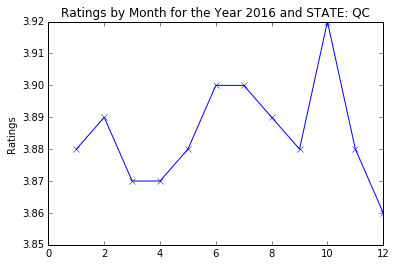

In [9]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2016 and STATE: QC')
plt.ylabel('Ratings')
plt.show()

## Query 5:
### Add one more line for the constant YEARLY AVG to the GRAPH above, for easier comparison.

### We know that the graph is for the year 2016 and state is QC because of the month_to_year_avg query 3 above.

<p> Result:</p>
<p> We see that the reviews drop compared to there yearly average in these months: January, March, April, May, August, November, December. </p>
<p> We also see that they increase in these months: June, July and September. </p>
<p> Now we can compare this result to other multiple results for different years but the same State to possibly see a pattern. </p>

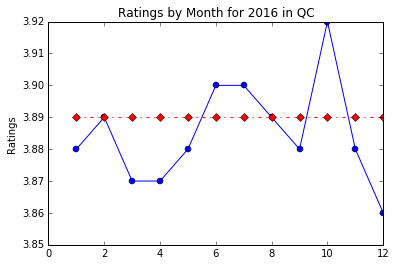

In [10]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2016 in QC')
plt.ylabel('Ratings')
plt.show()

## QUERY 6a,b,c : Query 3 Repeated with change in YEAR: 2015
## Getting a result for the year 2015 for QC.

In [11]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "QC" AND M.year = "2015"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2015|       3.83|      3.86|   QC|
|    2|2015|       3.87|      3.86|   QC|
|    3|2015|       3.86|      3.86|   QC|
|    4|2015|       3.91|      3.86|   QC|
|    5|2015|       3.79|      3.86|   QC|
|    6|2015|       3.82|      3.86|   QC|
|    7|2015|        3.9|      3.86|   QC|
|    8|2015|       3.82|      3.86|   QC|
|    9|2015|       3.81|      3.86|   QC|
|   10|2015|       3.91|      3.86|   QC|
|   11|2015|       3.89|      3.86|   QC|
|   12|2015|       3.87|      3.86|   QC|
+-----+----+-----------+----------+-----+



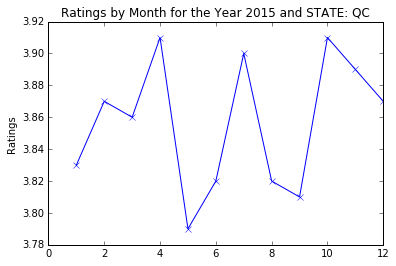

In [12]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2015 and STATE: QC')
plt.ylabel('Ratings')
plt.show()

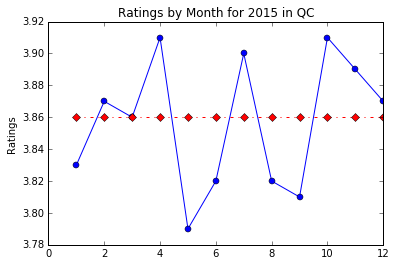

In [13]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2015 in QC')
plt.ylabel('Ratings')
plt.show()

## QUERY 7a,b,c : Query 3 Repeated with change in YEAR: 2014
## Getting a result for the year 2014 for QC.

In [14]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "QC" AND M.year = "2014"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2014|       3.81|      3.79|   QC|
|    2|2014|       3.79|      3.79|   QC|
|    3|2014|       3.81|      3.79|   QC|
|    4|2014|       3.87|      3.79|   QC|
|    5|2014|       3.76|      3.79|   QC|
|    6|2014|       3.79|      3.79|   QC|
|    7|2014|       3.83|      3.79|   QC|
|    8|2014|       3.76|      3.79|   QC|
|    9|2014|        3.7|      3.79|   QC|
|   10|2014|       3.81|      3.79|   QC|
|   11|2014|       3.75|      3.79|   QC|
|   12|2014|       3.75|      3.79|   QC|
+-----+----+-----------+----------+-----+



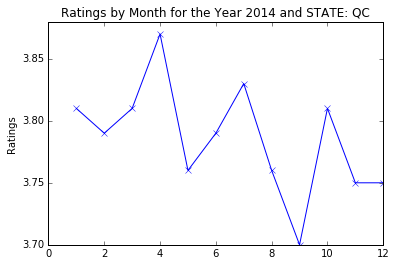

In [15]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2014 and STATE: QC')
plt.ylabel('Ratings')
plt.show()

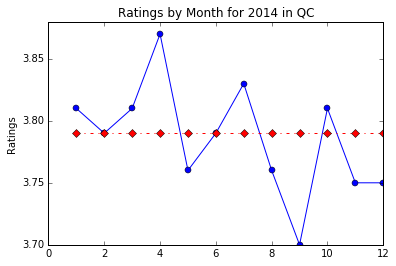

In [16]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2014 in QC')
plt.ylabel('Ratings')
plt.show()

## QUERY 8a,b,c : Query 3 Repeated with change in YEAR: 2014
## Getting a result for the year 2014 for QC.

In [32]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "QC" AND M.year = "2013"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2013|       3.76|      3.77|   QC|
|    2|2013|        3.8|      3.77|   QC|
|    3|2013|       3.74|      3.77|   QC|
|    4|2013|       3.77|      3.77|   QC|
|    5|2013|       3.78|      3.77|   QC|
|    6|2013|       3.75|      3.77|   QC|
|    7|2013|       3.73|      3.77|   QC|
|    8|2013|       3.74|      3.77|   QC|
|    9|2013|       3.77|      3.77|   QC|
|   10|2013|       3.81|      3.77|   QC|
|   11|2013|       3.83|      3.77|   QC|
|   12|2013|       3.79|      3.77|   QC|
+-----+----+-----------+----------+-----+



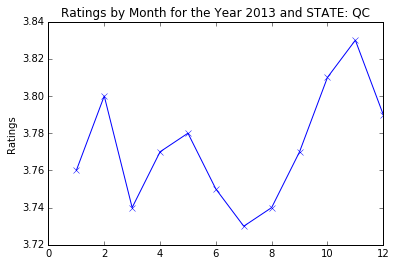

In [33]:
    from matplotlib import pyplot as plt
    month_list = df_month_to_year_avg.select("month").collect()
    monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

    plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
    plt.title('Ratings by Month for the Year 2013 and STATE: QC')
    plt.ylabel('Ratings')
    plt.show()

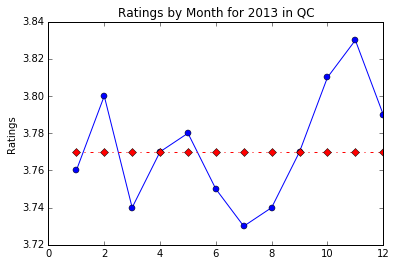

In [34]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2013 in QC')
plt.ylabel('Ratings')
plt.show()

# Here is a comparison of all the graphs next to each other, so that we can find some trend in ratings.

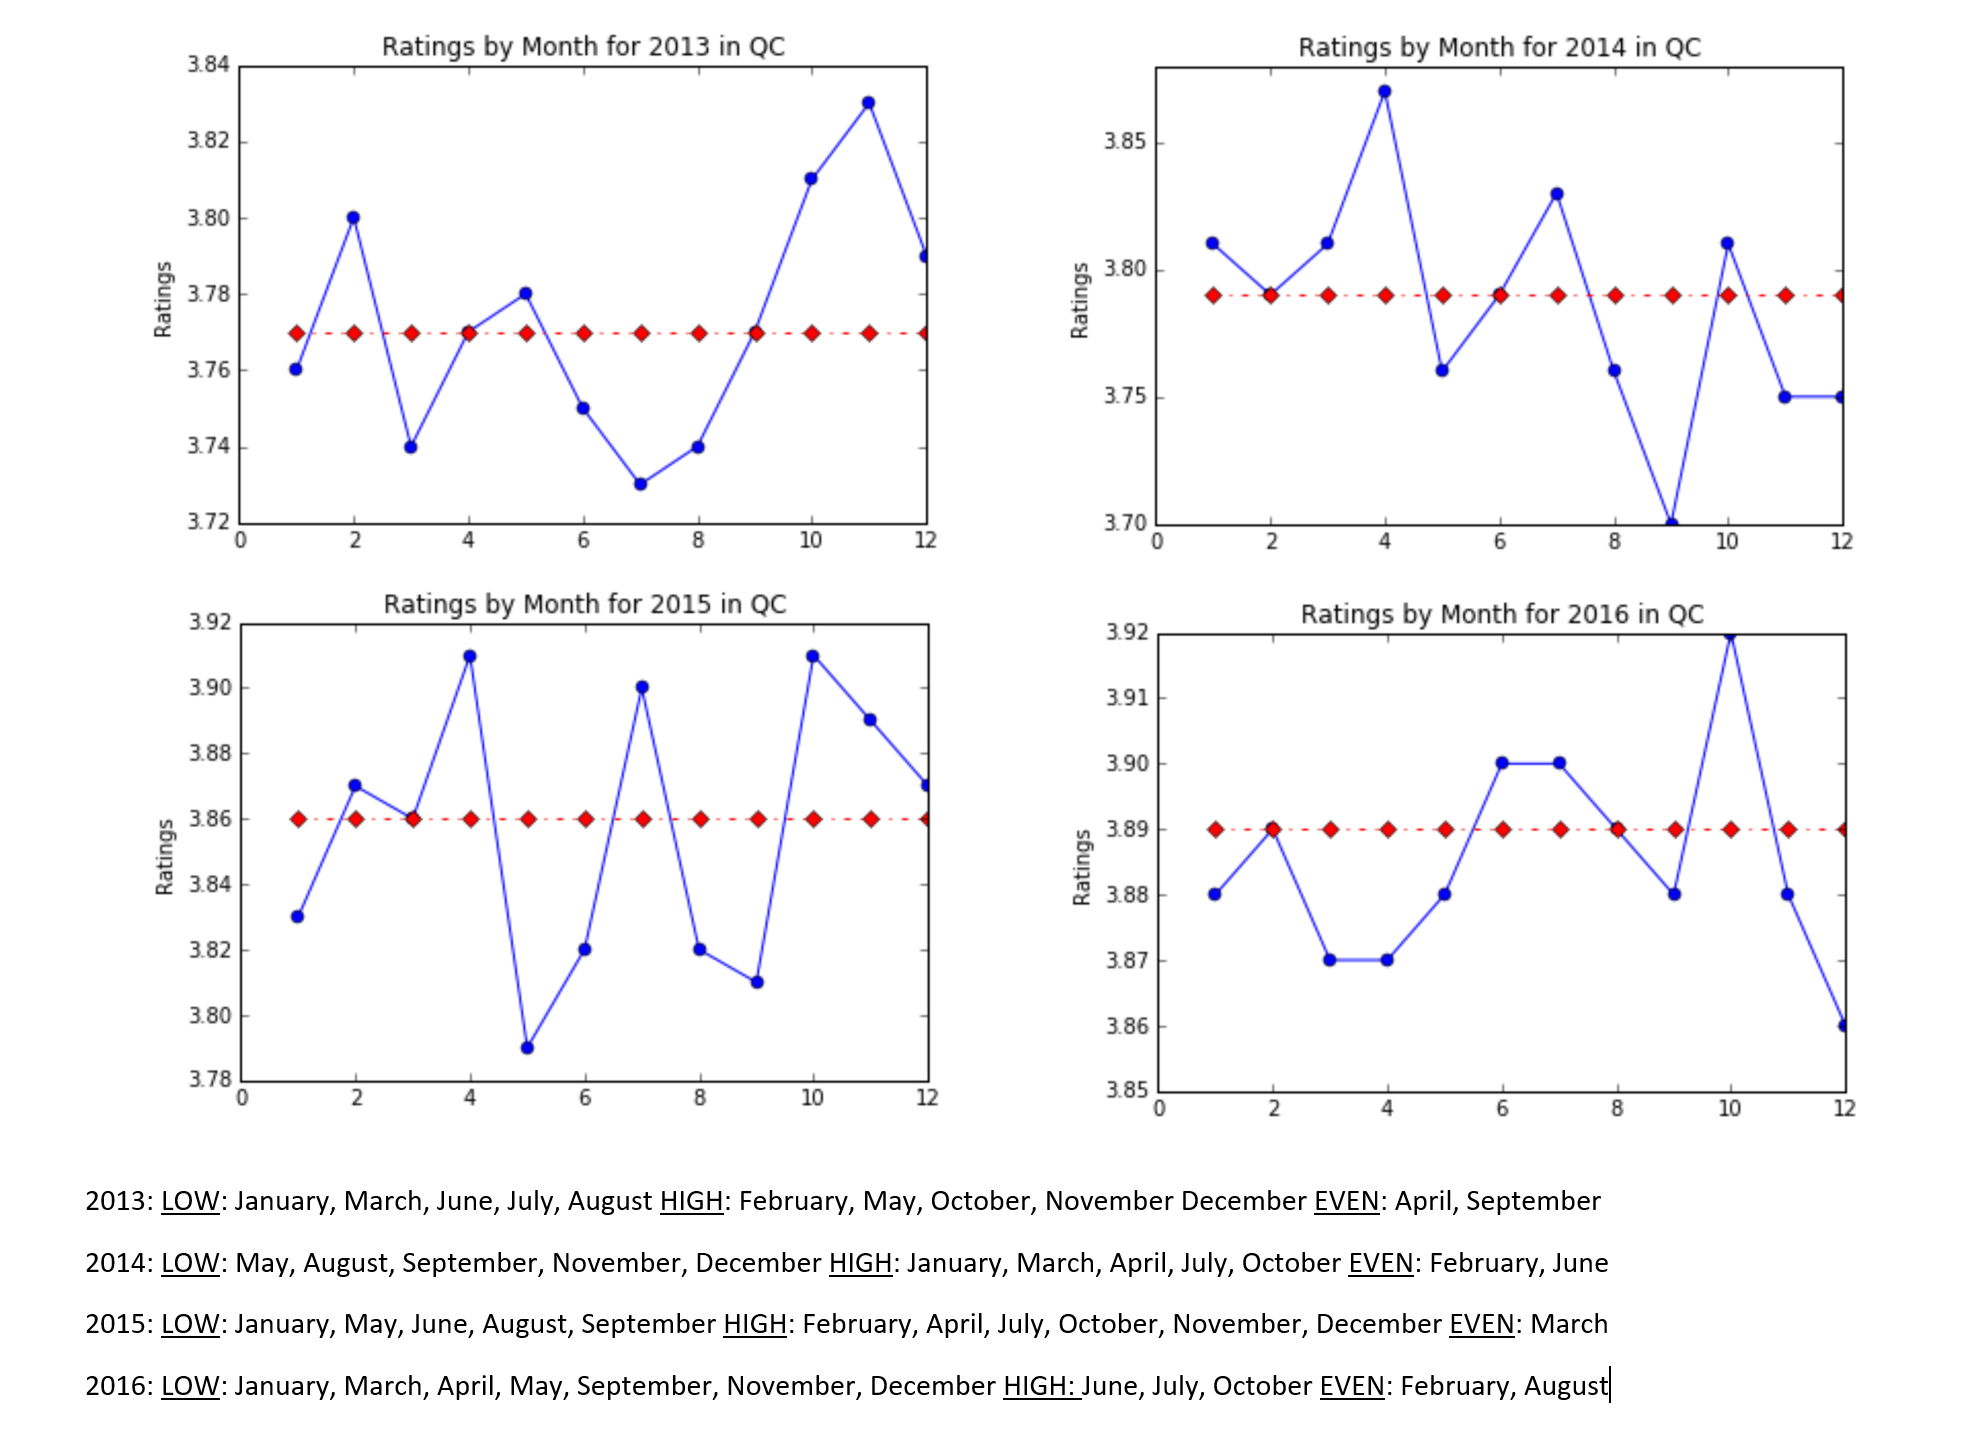

# BEGIN Ratings by Month for AZ in 2016, 2015, 2014, 2013

## QUERY 9a,b,c : Query 3 Repeated
## Getting a result for the year 2016 for AZ.

In [35]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "AZ" AND M.year = "2016"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2016|       3.83|      3.82|   AZ|
|    2|2016|        3.8|      3.82|   AZ|
|    3|2016|       3.79|      3.82|   AZ|
|    4|2016|       3.82|      3.82|   AZ|
|    5|2016|       3.81|      3.82|   AZ|
|    6|2016|       3.87|      3.82|   AZ|
|    7|2016|       3.84|      3.82|   AZ|
|    8|2016|        3.8|      3.82|   AZ|
|    9|2016|       3.84|      3.82|   AZ|
|   10|2016|       3.83|      3.82|   AZ|
|   11|2016|       3.84|      3.82|   AZ|
|   12|2016|        3.8|      3.82|   AZ|
+-----+----+-----------+----------+-----+



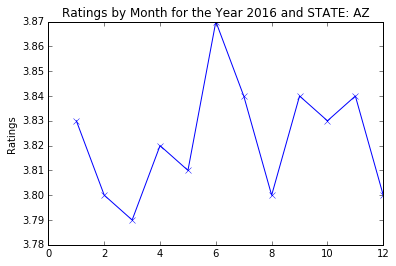

In [36]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2016 and STATE: AZ')
plt.ylabel('Ratings')
plt.show()

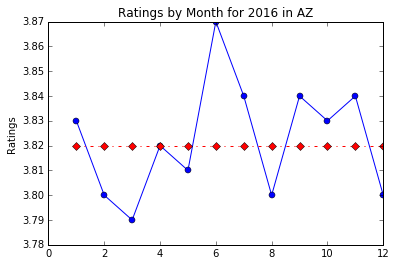

In [37]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2016 in AZ')
plt.ylabel('Ratings')
plt.show()

## QUERY 10a,b,c : Query 3 Repeated
## Getting a result for the year 2015 for AZ.

In [38]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "AZ" AND M.year = "2015"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2015|       3.76|      3.77|   AZ|
|    2|2015|       3.71|      3.77|   AZ|
|    3|2015|       3.69|      3.77|   AZ|
|    4|2015|       3.77|      3.77|   AZ|
|    5|2015|       3.76|      3.77|   AZ|
|    6|2015|        3.8|      3.77|   AZ|
|    7|2015|       3.83|      3.77|   AZ|
|    8|2015|       3.82|      3.77|   AZ|
|    9|2015|       3.79|      3.77|   AZ|
|   10|2015|       3.78|      3.77|   AZ|
|   11|2015|       3.79|      3.77|   AZ|
|   12|2015|       3.76|      3.77|   AZ|
+-----+----+-----------+----------+-----+



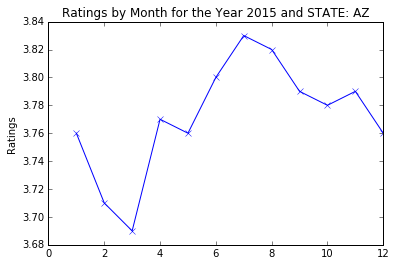

In [39]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2015 and STATE: AZ')
plt.ylabel('Ratings')
plt.show()

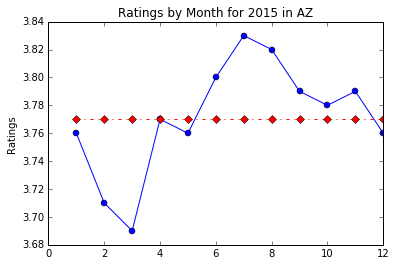

In [40]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2015 in AZ')
plt.ylabel('Ratings')
plt.show()

## QUERY 11a,b,c : Query 3 Repeated
## Getting a result for the year 2014 for AZ.

In [41]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "AZ" AND M.year = "2014"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2014|       3.75|      3.75|   AZ|
|    2|2014|       3.76|      3.75|   AZ|
|    3|2014|       3.73|      3.75|   AZ|
|    4|2014|       3.73|      3.75|   AZ|
|    5|2014|       3.73|      3.75|   AZ|
|    6|2014|       3.77|      3.75|   AZ|
|    7|2014|        3.8|      3.75|   AZ|
|    8|2014|       3.79|      3.75|   AZ|
|    9|2014|       3.74|      3.75|   AZ|
|   10|2014|       3.75|      3.75|   AZ|
|   11|2014|       3.74|      3.75|   AZ|
|   12|2014|       3.73|      3.75|   AZ|
+-----+----+-----------+----------+-----+



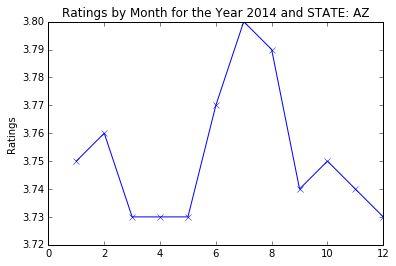

In [42]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2014 and STATE: AZ')
plt.ylabel('Ratings')
plt.show()

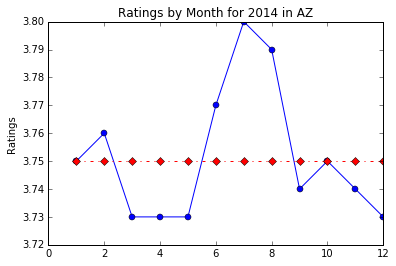

In [43]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2014 in AZ')
plt.ylabel('Ratings')
plt.show()

## QUERY 12a,b,c : Query 3 Repeated
## Getting a result for the year 2013 for AZ.

In [44]:
df_month_to_year_avg = spark.sql("""
SELECT M.month, M.year, M.monthly_avg, Y.yearly_avg, M.state
FROM avg_by_month AS M, avg_by_year AS Y
WHERE M.state = Y.state AND M.year = Y.year AND M.state = "AZ" AND M.year = "2013"
ORDER BY month, M.year""")
df_month_to_year_avg.show(50)
df_month_to_year_avg.createOrReplaceTempView("month_to_year_avg")

+-----+----+-----------+----------+-----+
|month|year|monthly_avg|yearly_avg|state|
+-----+----+-----------+----------+-----+
|    1|2013|       3.74|      3.71|   AZ|
|    2|2013|       3.68|      3.71|   AZ|
|    3|2013|        3.7|      3.71|   AZ|
|    4|2013|       3.66|      3.71|   AZ|
|    5|2013|       3.68|      3.71|   AZ|
|    6|2013|       3.71|      3.71|   AZ|
|    7|2013|       3.72|      3.71|   AZ|
|    8|2013|       3.74|      3.71|   AZ|
|    9|2013|       3.71|      3.71|   AZ|
|   10|2013|       3.72|      3.71|   AZ|
|   11|2013|       3.73|      3.71|   AZ|
|   12|2013|       3.73|      3.71|   AZ|
+-----+----+-----------+----------+-----+



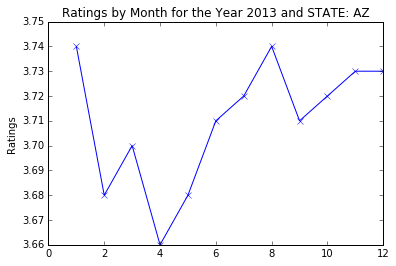

In [45]:
from matplotlib import pyplot as plt
month_list = df_month_to_year_avg.select("month").collect()
monthly_ratings_list = df_month_to_year_avg.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Ratings by Month for the Year 2013 and STATE: AZ')
plt.ylabel('Ratings')
plt.show()

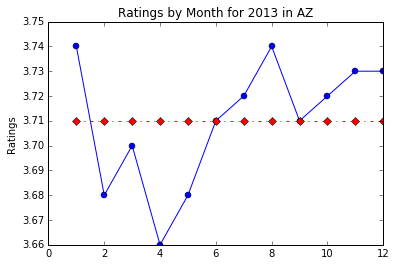

In [46]:
month2_list = df_month_to_year_avg.select("month").collect()
yearly_avg_list = df_month_to_year_avg.select("yearly_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, yearly_avg_list,'-.rD')

plt.title('Ratings by Month for 2013 in AZ')
plt.ylabel('Ratings')
plt.show()

## Underneath are all the Graphs for AZ from YEAR 2013 - 2016 combined for easier comparison of the trend line.

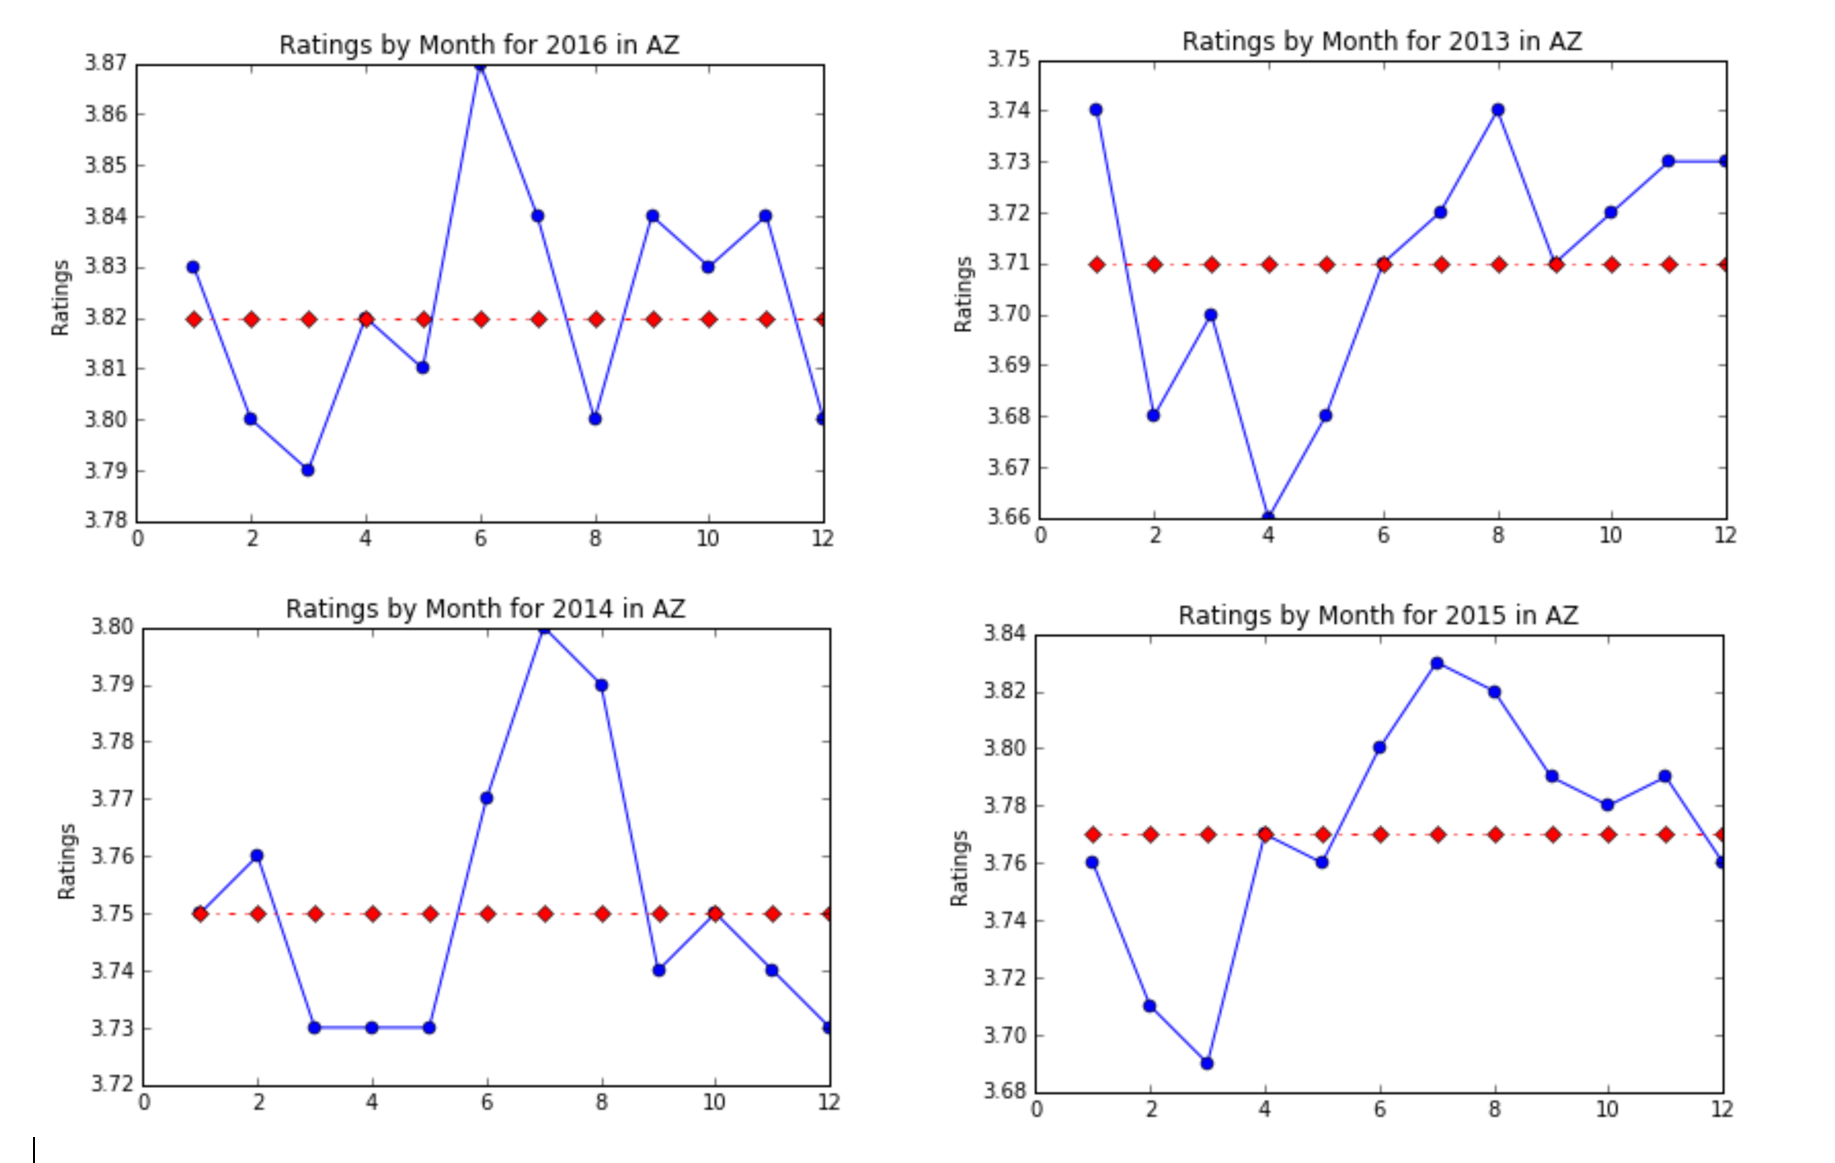

## Analyzing the graphs above.

<p> From the graphs above, it looks like there is some Seasonal variation. If we just look at every graph we see that that the blue line follows about the same pattern in all the graphs.</p>
<p> From about January till May in Arizona in any given year, the ratings are particularly lower for all the businesses located in AZ.</p>
<p> And from June to September in most cases... so the Summer season the ratings stay higher than the yearly average.</p>

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# SECOND APPROACH
## This Approach Compares The Overall AVG and of all the businesses that are in a certain metropolitan area

## Query 13:
#### Created a VIEW: "overall_state_avg"

<p> Why? </p>
<p> We need to compute the AVG Reviews of all the businesses (combined) within a STATE, so that the overall_avg of all the businesses can be compared with the combined_monthly_avg to look at any monthly variation in Ratings.</p>

<ul>Result:
<li>This results in a overall Average for all the businesses combined within a State.</li>
<li>Later we will merge overall_avg and monthly_avg together.</li>
</ul>

In [7]:
df_overall_state_avg = spark.sql("""
SELECT ROUND(AVG(R.stars),2) AS overall_avg, B.state
FROM review_data as R, business_data AS B
WHERE B.business_id = R.business_id
GROUP BY B.state
""")
df_overall_state_avg.show()
df_overall_state_avg.createOrReplaceTempView("overall_state_avg")

+-----------+-----+
|overall_avg|state|
+-----------+-----+
|       3.77|   AZ|
|       3.58|   SC|
|        5.0|   SL|
|       3.77|   BW|
|        3.0|  ZET|
|        4.8|    3|
|       4.09|  FAL|
|       3.63|   01|
|       3.43|  KHL|
|       4.14|  NYK|
|       2.57|  NTH|
|       3.76|  HLD|
|        4.1|  SCB|
|        3.5|   HH|
|       3.84|   QC|
|       4.19|  ESX|
|       3.74|   NV|
|       4.75|  GLG|
|       3.74|   WI|
|        4.5|   75|
+-----------+-----+
only showing top 20 rows



## Query 14:
### Here we give aliases, R = review_data, B = Business data
#### CREATED a VIEW: "monthly_avg_by_state"

<p> Why? </p>
<p> We need to compute the AVG Reviews of an entire state by MONTH, so that the monthly_avg can be compared with the overall_avg to look at any monthly variation in Ratings.</p>

<ul>Result:
<li> This results in a monthly average for all businesses (all years combined) within a State.</li>
<li> We will be able to call this data to merge with the query that has results of overall averages by State.</li>
</ul>

In [8]:
df_monthly_avg_per_state = spark.sql("""
SELECT MONTH(R.date) AS month, ROUND(AVG(R.stars),2) AS monthly_avg, B.state
FROM review_data as R, business_data AS B
WHERE B.business_id = R.business_id
GROUP BY MONTH(R.date), B.state
ORDER BY month, state
""")
df_monthly_avg_per_state.show()
df_monthly_avg_per_state.createOrReplaceTempView("monthly_avg_by_state")

+-----+-----------+-----+
|month|monthly_avg|state|
+-----+-----------+-----+
|    1|        5.0|    3|
|    1|        5.0|   AL|
|    1|       3.79|   AZ|
|    1|       3.74|   BW|
|    1|        2.5|   BY|
|    1|       3.14|    C|
|    1|        4.5|   CA|
|    1|        3.9|  EDH|
|    1|       3.78|  ELN|
|    1|        4.5|  ESX|
|    1|       3.32|  FIF|
|    1|        1.2|   FL|
|    1|        5.0|  FLN|
|    1|        4.0|  GLG|
|    1|        4.0|  HLD|
|    1|       3.64|   IL|
|    1|        5.0|  KHL|
|    1|       3.89|  MLN|
|    1|       3.71|   NC|
|    1|        3.0|   NI|
+-----+-----------+-----+
only showing top 20 rows




## Query 15: (This Query can be changed to get RESULTS for a particular STATE)
### COMBINING two Views together: "overall_state_avg" AND "monthly_avg_by_state"
#### Created a VIEW: "state_seasonal_rating"
<p> Why? <p>
<p> So that the chart that results from the combining of these two views can be converted into a meaningful graph that makes it easier for us to see, in what month was there a drop or spike in avg ratings and we can compare that to the results of different states to look for a possible pattern. </p>
<ul> Result: 
<li> We now have a side by side comparison of overall average to monthly average.</li>
<li> In the left most row we have months numbered.</li>
<li> And the column for State may seem redundant but it is there as check to make sure that the data we are recieving is for the same State.</li>
</ul>

In [9]:
df_state_seasonal_rating = spark.sql("""
SELECT M.month, M.monthly_avg, O.overall_avg, M.state
FROM overall_state_avg AS O, monthly_avg_by_state AS M
WHERE M.state = O.state AND M.state = "QC"
ORDER BY month""")
df_state_seasonal_rating.show(50)
df_state_seasonal_rating.createOrReplaceTempView("state_seasonal_rating")

+-----+-----------+-----------+-----+
|month|monthly_avg|overall_avg|state|
+-----+-----------+-----------+-----+
|    1|       3.84|       3.84|   QC|
|    2|       3.87|       3.84|   QC|
|    3|       3.84|       3.84|   QC|
|    4|       3.87|       3.84|   QC|
|    5|       3.83|       3.84|   QC|
|    6|       3.85|       3.84|   QC|
|    7|       3.86|       3.84|   QC|
|    8|       3.81|       3.84|   QC|
|    9|        3.8|       3.84|   QC|
|   10|       3.87|       3.84|   QC|
|   11|       3.83|       3.84|   QC|
|   12|       3.82|       3.84|   QC|
+-----+-----------+-----------+-----+



## Query 16:
## Plots JUST the MONTHLY Averages
### x axis: Months in numbers, y axis: Ratings
<p> Result: </p>
<p> We know that these are the ratings of each month, but we don't have any other visual to compare this data with. </p>
<p> All that we see are a constant spikes in the ratings. Therefore, we will add one more constant line for overall average to add to this graph.</p>

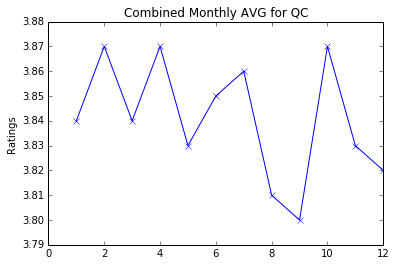

In [10]:
from matplotlib import pyplot as plt
month_list = df_state_seasonal_rating.select("month").collect()
monthly_ratings_list = df_state_seasonal_rating.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Combined Monthly AVG for QC')
plt.ylabel('Ratings')
plt.show()

## Query 17:
### Add one more line for the constant Overall AVG to the GRAPH above, for easier comparison.

### We know that the graph is for the state is QC because of the state_seasonal_rating query above.

<p> Result:</p>
<p> We see some constant spikes in the ratings.</p>
<p> Now we can compare this result to other multiple results for different States/Metropolitan Areas to possibly see a pattern. </p>

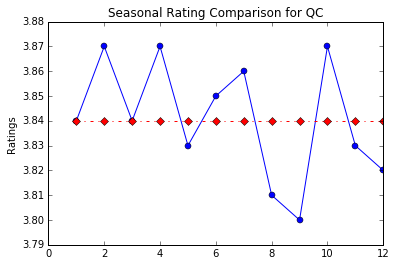

In [11]:
month2_list = df_state_seasonal_rating.select("month").collect()
overall_avg_list = df_state_seasonal_rating.select("overall_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, overall_avg_list,'-.rD')

plt.title('Seasonal Rating Comparison for QC')
plt.ylabel('Ratings')
plt.show()

# QUERY 18a,b,c : Query 15,16,17 Repeated
## Getting a result for AZ.

In [12]:
df_state_seasonal_rating = spark.sql("""
SELECT M.month, M.monthly_avg, O.overall_avg, M.state
FROM overall_state_avg AS O, monthly_avg_by_state AS M
WHERE M.state = O.state AND M.state = "AZ"
ORDER BY month""")
df_state_seasonal_rating.show(50)
df_state_seasonal_rating.createOrReplaceTempView("state_seasonal_rating_AZ")

+-----+-----------+-----------+-----+
|month|monthly_avg|overall_avg|state|
+-----+-----------+-----------+-----+
|    1|       3.79|       3.77|   AZ|
|    2|       3.76|       3.77|   AZ|
|    3|       3.74|       3.77|   AZ|
|    4|       3.77|       3.77|   AZ|
|    5|       3.77|       3.77|   AZ|
|    6|        3.8|       3.77|   AZ|
|    7|        3.8|       3.77|   AZ|
|    8|       3.77|       3.77|   AZ|
|    9|       3.77|       3.77|   AZ|
|   10|       3.76|       3.77|   AZ|
|   11|       3.76|       3.77|   AZ|
|   12|       3.75|       3.77|   AZ|
+-----+-----------+-----------+-----+



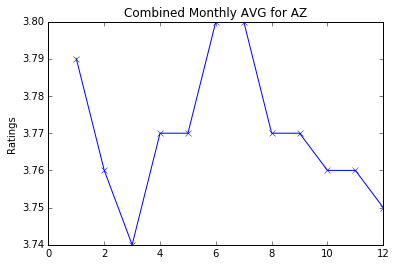

In [13]:
from matplotlib import pyplot as plt
month_list = df_state_seasonal_rating.select("month").collect()
monthly_ratings_list = df_state_seasonal_rating.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Combined Monthly AVG for AZ')
plt.ylabel('Ratings')
plt.show()

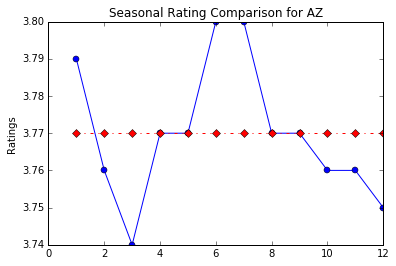

In [14]:
month2_list = df_state_seasonal_rating.select("month").collect()
overall_avg_list = df_state_seasonal_rating.select("overall_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, overall_avg_list,'-.rD')

plt.title('Seasonal Rating Comparison for AZ')
plt.ylabel('Ratings')
plt.show()

# QUERY 19a,b,c : Query 15,16,17 Repeated
## Getting a result for NV.

In [15]:
df_state_seasonal_rating = spark.sql("""
SELECT M.month, M.monthly_avg, O.overall_avg, M.state
FROM overall_state_avg AS O, monthly_avg_by_state AS M
WHERE M.state = O.state AND M.state = "NV"
ORDER BY month""")
df_state_seasonal_rating.show(50)
df_state_seasonal_rating.createOrReplaceTempView("state_seasonal_rating_NV")

+-----+-----------+-----------+-----+
|month|monthly_avg|overall_avg|state|
+-----+-----------+-----------+-----+
|    1|       3.75|       3.74|   NV|
|    2|       3.77|       3.74|   NV|
|    3|       3.74|       3.74|   NV|
|    4|       3.75|       3.74|   NV|
|    5|       3.75|       3.74|   NV|
|    6|       3.73|       3.74|   NV|
|    7|       3.73|       3.74|   NV|
|    8|       3.72|       3.74|   NV|
|    9|       3.73|       3.74|   NV|
|   10|       3.75|       3.74|   NV|
|   11|       3.73|       3.74|   NV|
|   12|       3.69|       3.74|   NV|
+-----+-----------+-----------+-----+



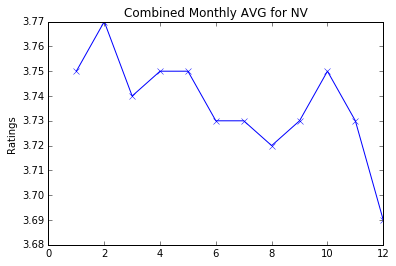

In [16]:
from matplotlib import pyplot as plt
month_list = df_state_seasonal_rating.select("month").collect()
monthly_ratings_list = df_state_seasonal_rating.select("monthly_avg").collect()

plt.plot(month_list, monthly_ratings_list, color='blue', marker='x', linestyle='solid')
plt.title('Combined Monthly AVG for NV')
plt.ylabel('Ratings')
plt.show()

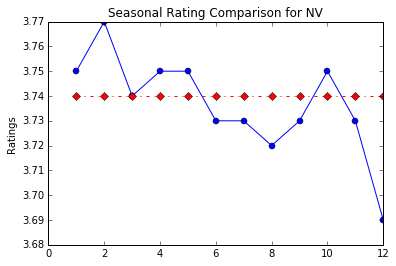

In [17]:
month2_list = df_state_seasonal_rating.select("month").collect()
overall_avg_list = df_state_seasonal_rating.select("overall_avg").collect()
plt.plot(month_list, monthly_ratings_list,'-bo', month2_list, overall_avg_list,'-.rD')

plt.title('Seasonal Rating Comparison for NV')
plt.ylabel('Ratings')
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# THIRD Approach.

# Sorting Seasonal Variation by Business Categories
## Purpose of the query ran below: Gets business id, and Average rating (2 decimal places).
### Query 20.

In [5]:
df_business_avg_rating = spark.sql("""
SELECT business_id, ROUND(AVG(stars),2) AS business_avg
FROM review_data
GROUP BY business_id""")
df_business_avg_rating.show()
df_business_avg_rating.createOrReplaceTempView('business_avg_rating')

+--------------------+------------+
|         business_id|business_avg|
+--------------------+------------+
|VbxdWrQ7WHSN7S0RU...|         3.5|
|_vj8nh6MceJLInLoM...|        2.86|
|VDRlaNF0iohnYTZzm...|         3.5|
|OGQ_6nIn4QQL2U6t0...|        4.58|
|nkh7rzfDVuyKncuKv...|         3.4|
|ymsmO5Vy6xKZayua9...|         1.5|
|AdPuYsduU1o1FAqlD...|         3.0|
|rWxAgLSI0Sk1MCpQG...|        3.92|
|19m3NtbbP2VX-tDFJ...|         4.0|
|yGjuMgFdYML350jYX...|         2.6|
|lJHrUboI-RaAX37vf...|        4.08|
|TCJoCBGnR_mrVBNRU...|        3.67|
|oZnXZHrRAOzVfdopP...|        3.43|
|Pr3IqTTaeJHPWqFKt...|         1.0|
|COL0SAJf-k7jVd2hL...|         4.3|
|7bFqnBRxT0rbexxsL...|        2.74|
|b-dMCUh7T2Kya1O7Z...|        2.79|
|X2K-6-Aw6_7sQew9l...|         4.5|
|TxKS_0l4qp5X0lZKq...|         4.0|
|U2SepNV2djq1hgk4W...|        2.33|
+--------------------+------------+
only showing top 20 rows



# Query 21.
### Purpose: To merge review.json and business.json with some important fields and also filter out Category: Ice Cream Parlor for ALL States.

In [6]:
df_business_review_stuff_icecream = spark.sql("""
SELECT B.business_id, B.state, R.user_id, R.review_id, R.stars, MONTH(R.date) AS month
FROM business_data AS B, review_data AS R
WHERE B.business_id = R.business_id AND ARRAY_CONTAINS(B.categories, 'Ice Cream & Frozen Yogurt')
AND NOT ARRAY_CONTAINS(B.categories, 'Restaurants') AND NOT ARRAY_CONTAINS(B.categories, 'Event Planning & Services')
AND NOT ARRAY_CONTAINS(B.categories, 'Bars') AND NOT ARRAY_CONTAINS(B.categories, 'Wedding Planning')
AND NOT ARRAY_CONTAINS(B.categories, 'Shopping') AND NOT ARRAY_CONTAINS(B.categories, 'Bakeries')
AND NOT ARRAY_CONTAINS(B.categories, 'Specialty Food') AND NOT ARRAY_CONTAINS(B.categories, 'Active Life')
AND NOT ARRAY_CONTAINS(B.categories, 'Plumbing') AND NOT ARRAY_CONTAINS(B.categories, 'Weight Loss Centers')
AND NOT ARRAY_CONTAINS(B.categories, 'Water Purification Services') AND NOT ARRAY_CONTAINS(B.categories, 'Gas Stations')
AND NOT ARRAY_CONTAINS(B.categories, 'Hotels & Travel') AND NOT ARRAY_CONTAINS(B.categories, 'Beauty & Spas')
AND NOT ARRAY_CONTAINS(B.categories, 'Convenience Stores') AND NOT ARRAY_CONTAINS(B.categories, 'Arcades')
""")
df_business_review_stuff_icecream.show()
df_business_review_stuff_icecream.createOrReplaceTempView('business_review_stuff_icecream')

+--------------------+-----+--------------------+--------------------+-----+-----+
|         business_id|state|             user_id|           review_id|stars|month|
+--------------------+-----+--------------------+--------------------+-----+-----+
|dkUHHaTdv1p4f0zPt...|   NC|zsZBYWYEmLLs81_f-...|fiS8iHHYk7ajVDRbC...|    4|    8|
|dkUHHaTdv1p4f0zPt...|   NC|aDYNz8cujkDdmbiOh...|FUxu7SOybPIO4sstL...|    4|    8|
|dkUHHaTdv1p4f0zPt...|   NC|E_KBptkphsaPU2krf...|mhA_uJX6JbNGO6eC0...|    3|    5|
|dkUHHaTdv1p4f0zPt...|   NC|Ry1O_KXZHGRI8g5zB...|UCzYAs_aRSv4AdMEy...|    3|    6|
|dkUHHaTdv1p4f0zPt...|   NC|Szle_N5FSs4Q7odfy...|VUxyeFfUp5d18vxI9...|    3|    3|
|Du8gPSC88a9OuY1Vk...|   NV|MR9E15cGxAO-mZQtu...|jOJDWoDY0M8gYhvDH...|    4|    7|
|Du8gPSC88a9OuY1Vk...|   NV|Y8akYgxl9PkE5LsZx...|UWzec50iUmODDjGVt...|    4|    8|
|Du8gPSC88a9OuY1Vk...|   NV|PKEzKWv_FktMm2mGP...|AjNoav6_F_mVNslLe...|    3|   10|
|Du8gPSC88a9OuY1Vk...|   NV|mySDXsBhY3u0yI-G2...|SGs0BzBMQUlaSt9X6...|    4|    6|
|Du8

# Query 22.
### Purpose: Merges both of the views created above in Query 20 and 21 so that the dataframe that results from this can be exported to a csv that can be used in Tableau.
### Result: List of all the businesses in AZ that mainly sell ice cream.

In [7]:
df_merge_for_tableau_icecream_AZ = spark.sql("""
SELECT R.business_id, R.user_id, R.stars, A.business_avg, R.month, R.state
FROM business_avg_rating AS A, business_review_stuff_icecream AS R
WHERE A.business_id = R.business_id AND R.state = 'AZ'
""")
df_merge_for_tableau_icecream_AZ.show()


+--------------------+--------------------+-----+------------+-----+-----+
|         business_id|             user_id|stars|business_avg|month|state|
+--------------------+--------------------+-----+------------+-----+-----+
|_9u7I2RN0NEJnWaP2...|kCVPl2RumlSgSDx9P...|    4|         3.5|    5|   AZ|
|_9u7I2RN0NEJnWaP2...|xrmGuJK6toTfli3Uw...|    5|         3.5|    9|   AZ|
|_9u7I2RN0NEJnWaP2...|iXrchWHS2YI_W4x5s...|    1|         3.5|    6|   AZ|
|_9u7I2RN0NEJnWaP2...|XTryBW8RmKk1ElN77...|    5|         3.5|    1|   AZ|
|_9u7I2RN0NEJnWaP2...|YlNzH54vaI0qD2hfu...|    3|         3.5|   12|   AZ|
|_9u7I2RN0NEJnWaP2...|KGsXnYHvYddGaL_jy...|    3|         3.5|    5|   AZ|
|ZH-x6xYNEZ7ZjBQOo...|FN_dtNW1fux4O6qYX...|    4|        3.85|    9|   AZ|
|ZH-x6xYNEZ7ZjBQOo...|TO4hMNOFquaLI1tlL...|    3|        3.85|    1|   AZ|
|ZH-x6xYNEZ7ZjBQOo...|psmg27I7gvsx4lPgM...|    3|        3.85|   12|   AZ|
|ZH-x6xYNEZ7ZjBQOo...|GYutlm3WoyWozve1T...|    5|        3.85|   12|   AZ|
|ZH-x6xYNEZ7ZjBQOo...|RNE

# Query 23
## Exporting the dataframe above.

In [8]:
df_merge_for_tableau_icecream_AZ_out = df_merge_for_tableau_icecream_AZ.repartition(1)

path_out = bmos.url('Fall2017', 'export_icecreamAZ_reviews.csv')
df_merge_for_tableau_icecream_AZ_out.write.csv(path_out, mode="overwrite", header = "true")

# The following graph shows the Rating Difference Distribution for every month in AZ for ice cream parlors. It looks like people like ice cream the same whether its winter or summer.

## What we expected was that there would be a significant rating difference in summer as opposed to winter. We though ice cream shops would be getting bad ratings in winter, but seems like that is not the case.

<p>We can clearly see that the median stays about the same, which is portrayed by the dotted line. We also see that the area of the grey box stays about the same which means that people rate ice cream parlors in about the same positive or negative range every month.</p>

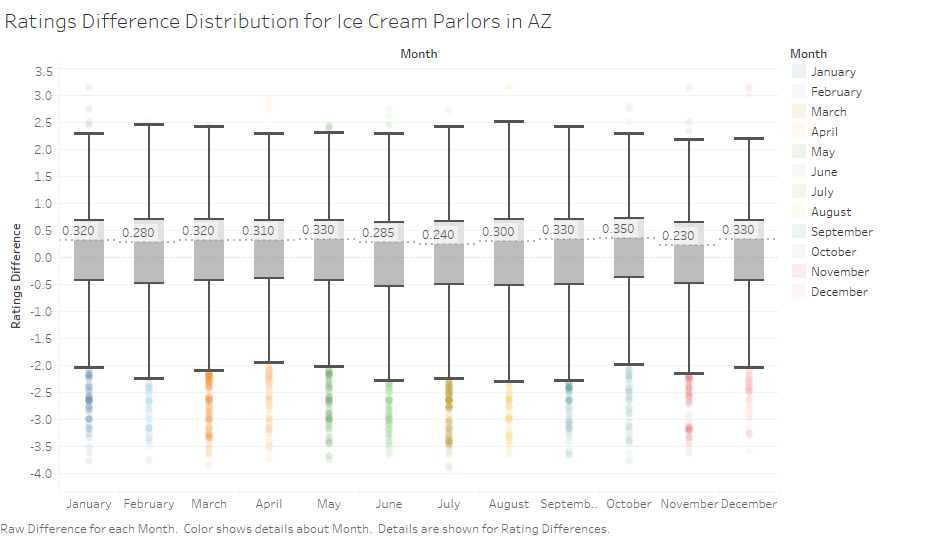



# Query 24
## The query below was ran as a curiosity to whether there is seasonal rating variation in Nevada in the category of hotels and Travel. We know that Las Vegas is in Nevada therefore we expected that there would be a lot of data we can work with in this state.
### However, we were sure after queries ran above that we won't find much variation here.
### The query below is just to export the dataframe to tableau.

In [6]:
df_business_review_stuff_resorts = spark.sql("""
SELECT B.business_id, B.state, R.user_id, R.review_id, R.stars, MONTH(R.date) AS month
FROM business_data AS B, review_data AS R
WHERE B.business_id = R.business_id AND ARRAY_CONTAINS(B.categories, 'Hotels & Travel')
""")
df_business_review_stuff_resorts.show()
df_business_review_stuff_resorts.createOrReplaceTempView('business_review_stuff_resorts')

+--------------------+-----+--------------------+--------------------+-----+-----+
|         business_id|state|             user_id|           review_id|stars|month|
+--------------------+-----+--------------------+--------------------+-----+-----+
|uYHaNptLzDLoV_JZ_...|  EDH|cjpdDjZyprfyDG3Rl...|VfBHSwC5Vz_pbFluy...|    5|    7|
|uYHaNptLzDLoV_JZ_...|  EDH|bjTcT8Ty4cJZhEOEo...|3zRpneRKDsOPq92tq...|    3|   10|
|uYHaNptLzDLoV_JZ_...|  EDH|AXgRULmWcME7J6Ix3...|ne5WhI1jUFOcRn-b-...|    3|    9|
|uYHaNptLzDLoV_JZ_...|  EDH|oU2SSOmsp_A8JYI7Z...|llmdwOgDReucVoWEr...|    4|    8|
|uYHaNptLzDLoV_JZ_...|  EDH|0xtbPEna2Kei11vsU...|DuffS87NaSMDmIflu...|    5|   11|
|uYHaNptLzDLoV_JZ_...|  EDH|rW8q706dz5-NnXDzM...|GvLmUkjUrOyFH8KFn...|    5|    6|
|uYHaNptLzDLoV_JZ_...|  EDH|yx8vNXUL0D0HS8rUI...|lGEl24NGj2HVBJrod...|    4|    2|
|uYHaNptLzDLoV_JZ_...|  EDH|zXnH6W74FAJQ7q7b-...|cUgvEy5wj7zYE68v1...|    4|    7|
|uYHaNptLzDLoV_JZ_...|  EDH|c5yp5hxwC1N98MjbV...|FSB_BnvysBgH3JYrb...|    4|    4|
|uYH

# The query below is just part of exporting the dataframe to tableau. We will merge the data above and the data below so that we can have all the necessary fields.

In [20]:
df_merge_for_tableau_resorts_NV = spark.sql("""
SELECT R.business_id, R.user_id, R.stars, A.business_avg, R.month, R.state
FROM business_avg_rating AS A, business_review_stuff_resorts AS R
WHERE A.business_id = R.business_id AND R.state = 'NV'
""")
df_merge_for_tableau_resorts_NV.show()

+--------------------+--------------------+-----+------------+-----+-----+
|         business_id|             user_id|stars|business_avg|month|state|
+--------------------+--------------------+-----+------------+-----+-----+
|1gSf3g2qSUhOuNdvU...|5zdp2a-arA3tNVRZh...|    1|        2.78|   11|   NV|
|1gSf3g2qSUhOuNdvU...|HbFgGVo-VCu7h8cwO...|    5|        2.78|    4|   NV|
|1gSf3g2qSUhOuNdvU...|IYXIukQ6Pbwe090Si...|    1|        2.78|    7|   NV|
|1gSf3g2qSUhOuNdvU...|-J8Pu_-4V5M4RovSg...|    5|        2.78|   10|   NV|
|1gSf3g2qSUhOuNdvU...|LW6qlH3ulqKNcBkA1...|    1|        2.78|    5|   NV|
|1gSf3g2qSUhOuNdvU...|oN_2tLKU2sQNhiCPA...|    1|        2.78|   11|   NV|
|1gSf3g2qSUhOuNdvU...|HlwBQd7YD04su18aB...|    1|        2.78|    1|   NV|
|1gSf3g2qSUhOuNdvU...|7pqtUZe6g-vxKQPpR...|    5|        2.78|    5|   NV|
|1gSf3g2qSUhOuNdvU...|3R-Lln4XU2vKp5dkl...|    5|        2.78|    4|   NV|
|565NbMW3BMHxjY0cs...|9FXLPjLdcSvBw4vGm...|    1|         2.0|   11|   NV|
|565NbMW3BMHxjY0cs...|Ote

# This query actually coverts our dataframe into a csv so that it can be transfered to tableau for more clear visualizations.

In [21]:
df_merge_for_tableau_resorts_NV_out = df_merge_for_tableau_resorts_NV.repartition(1)

path_out = bmos.url('Fall2017', 'export_resorts_NV_reviews.csv')
df_merge_for_tableau_resorts_NV_out.write.csv(path_out, mode="overwrite", header = "true")

# The bar graph below mainly shows us in what months to hotels get most reviews. And we also see that people are more likely to rate a resort .5 higher as compared to giving a place a lower rating.

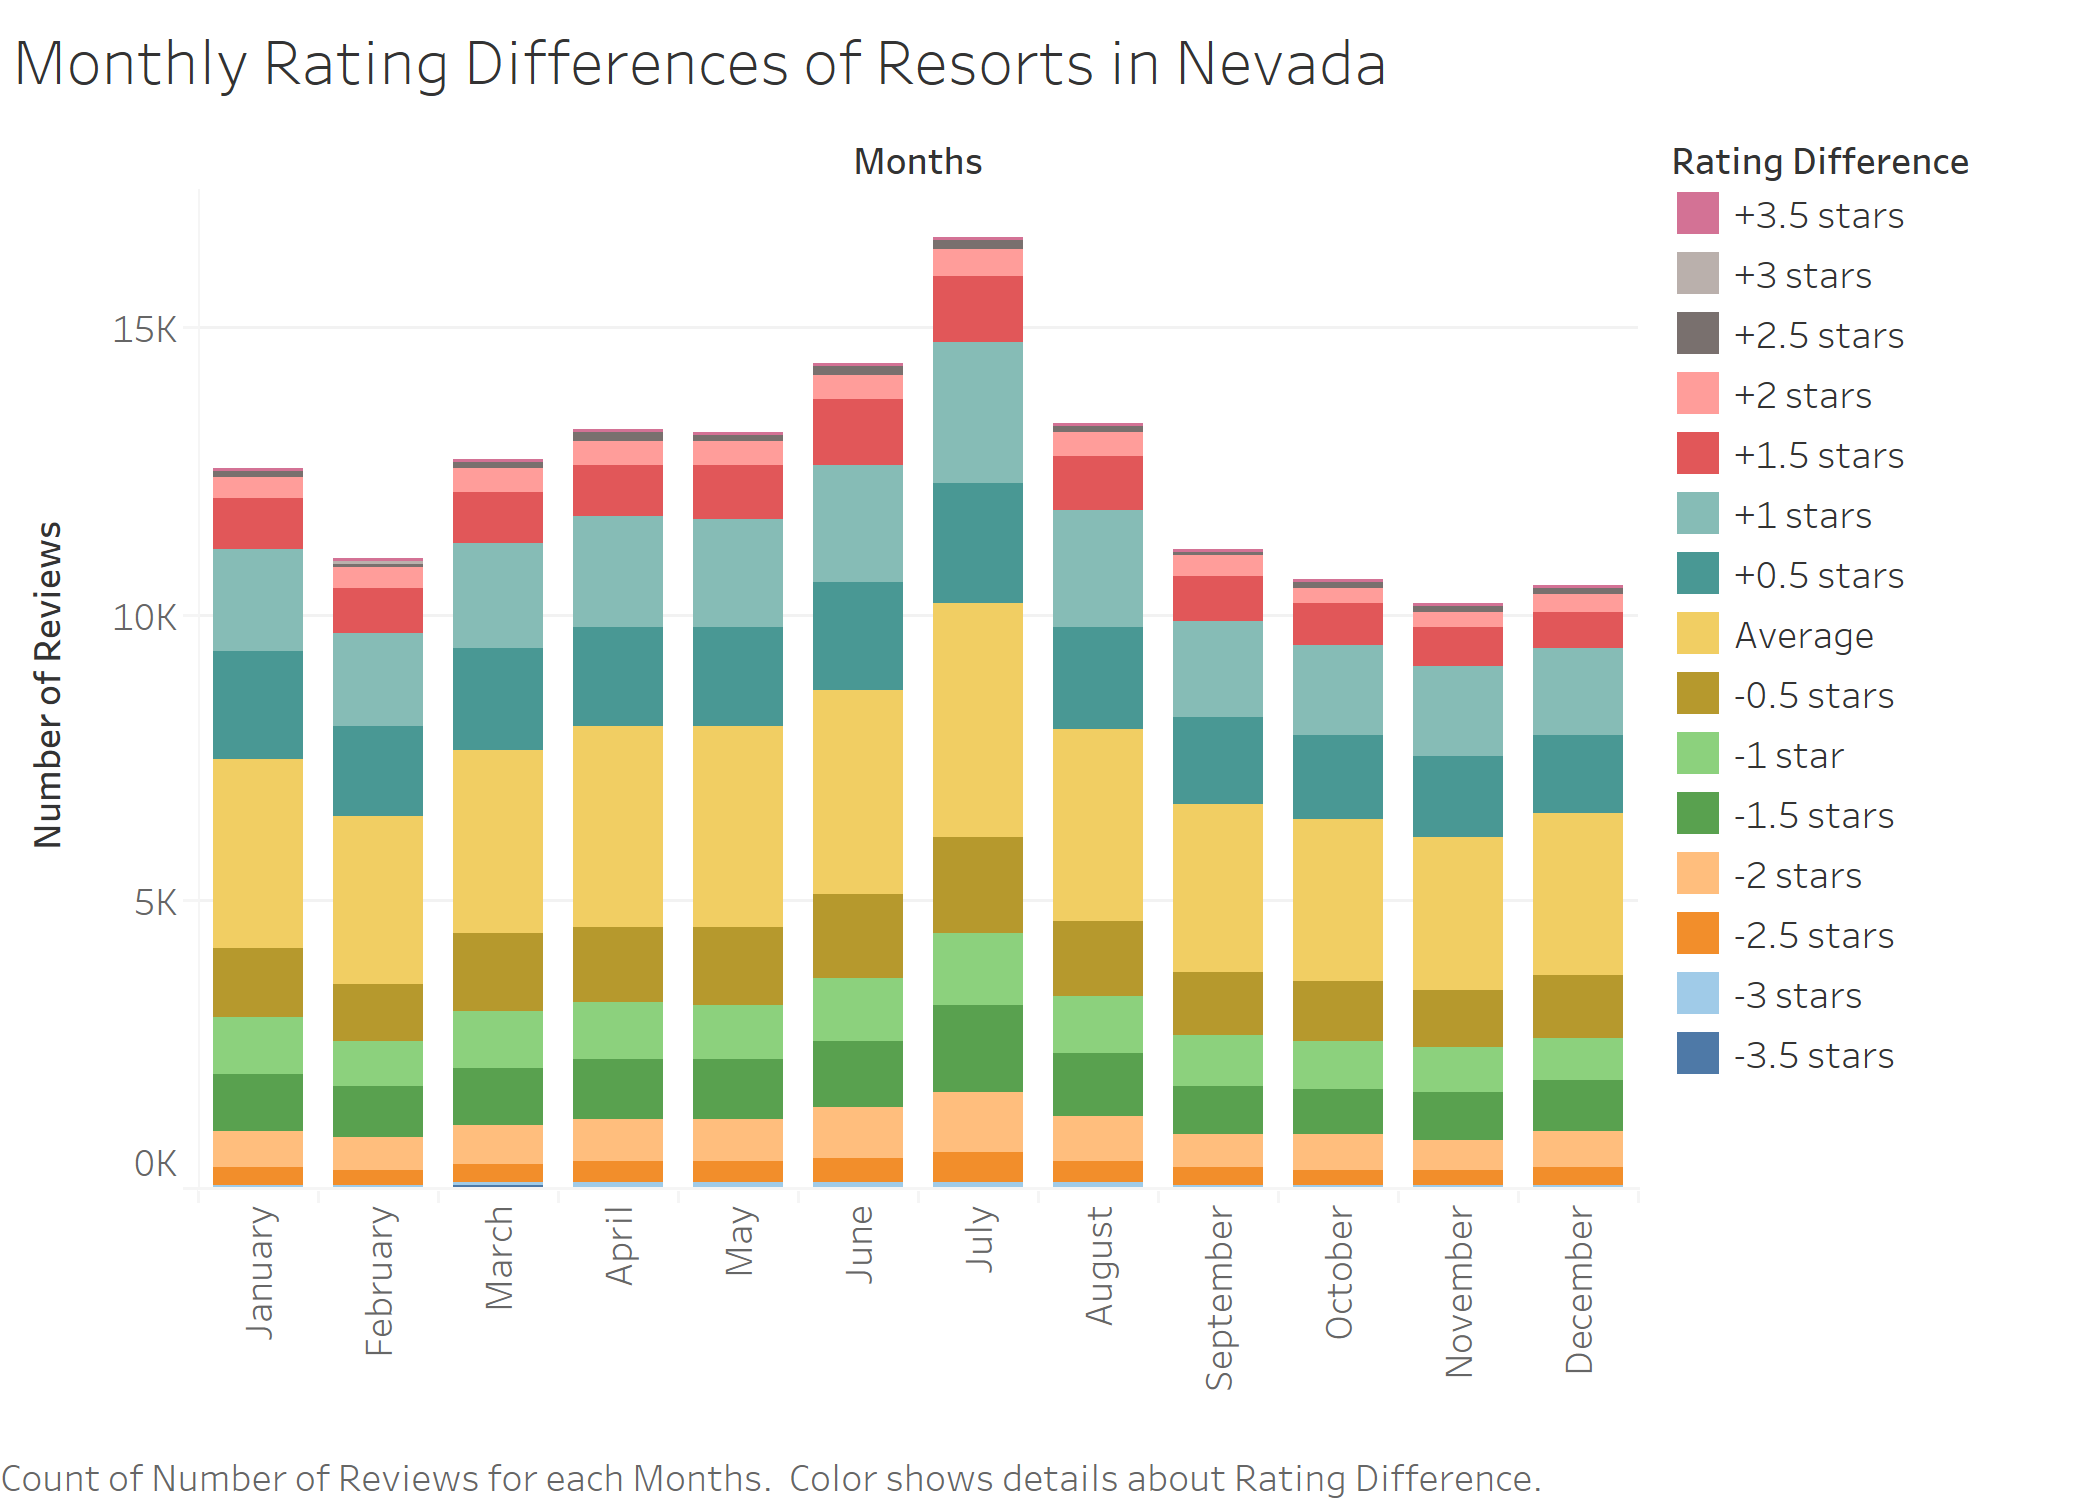

# In the box and whiskers plot below we can clearly see rating variations in different months. The dotted line respresents the median and the grey box represents the most likelihood rating difference. As we can see the dotted line as well as the box plot is consistent throughout all the months.

# Which means people dont rate a resort higher or lower depending on what month or season it is.

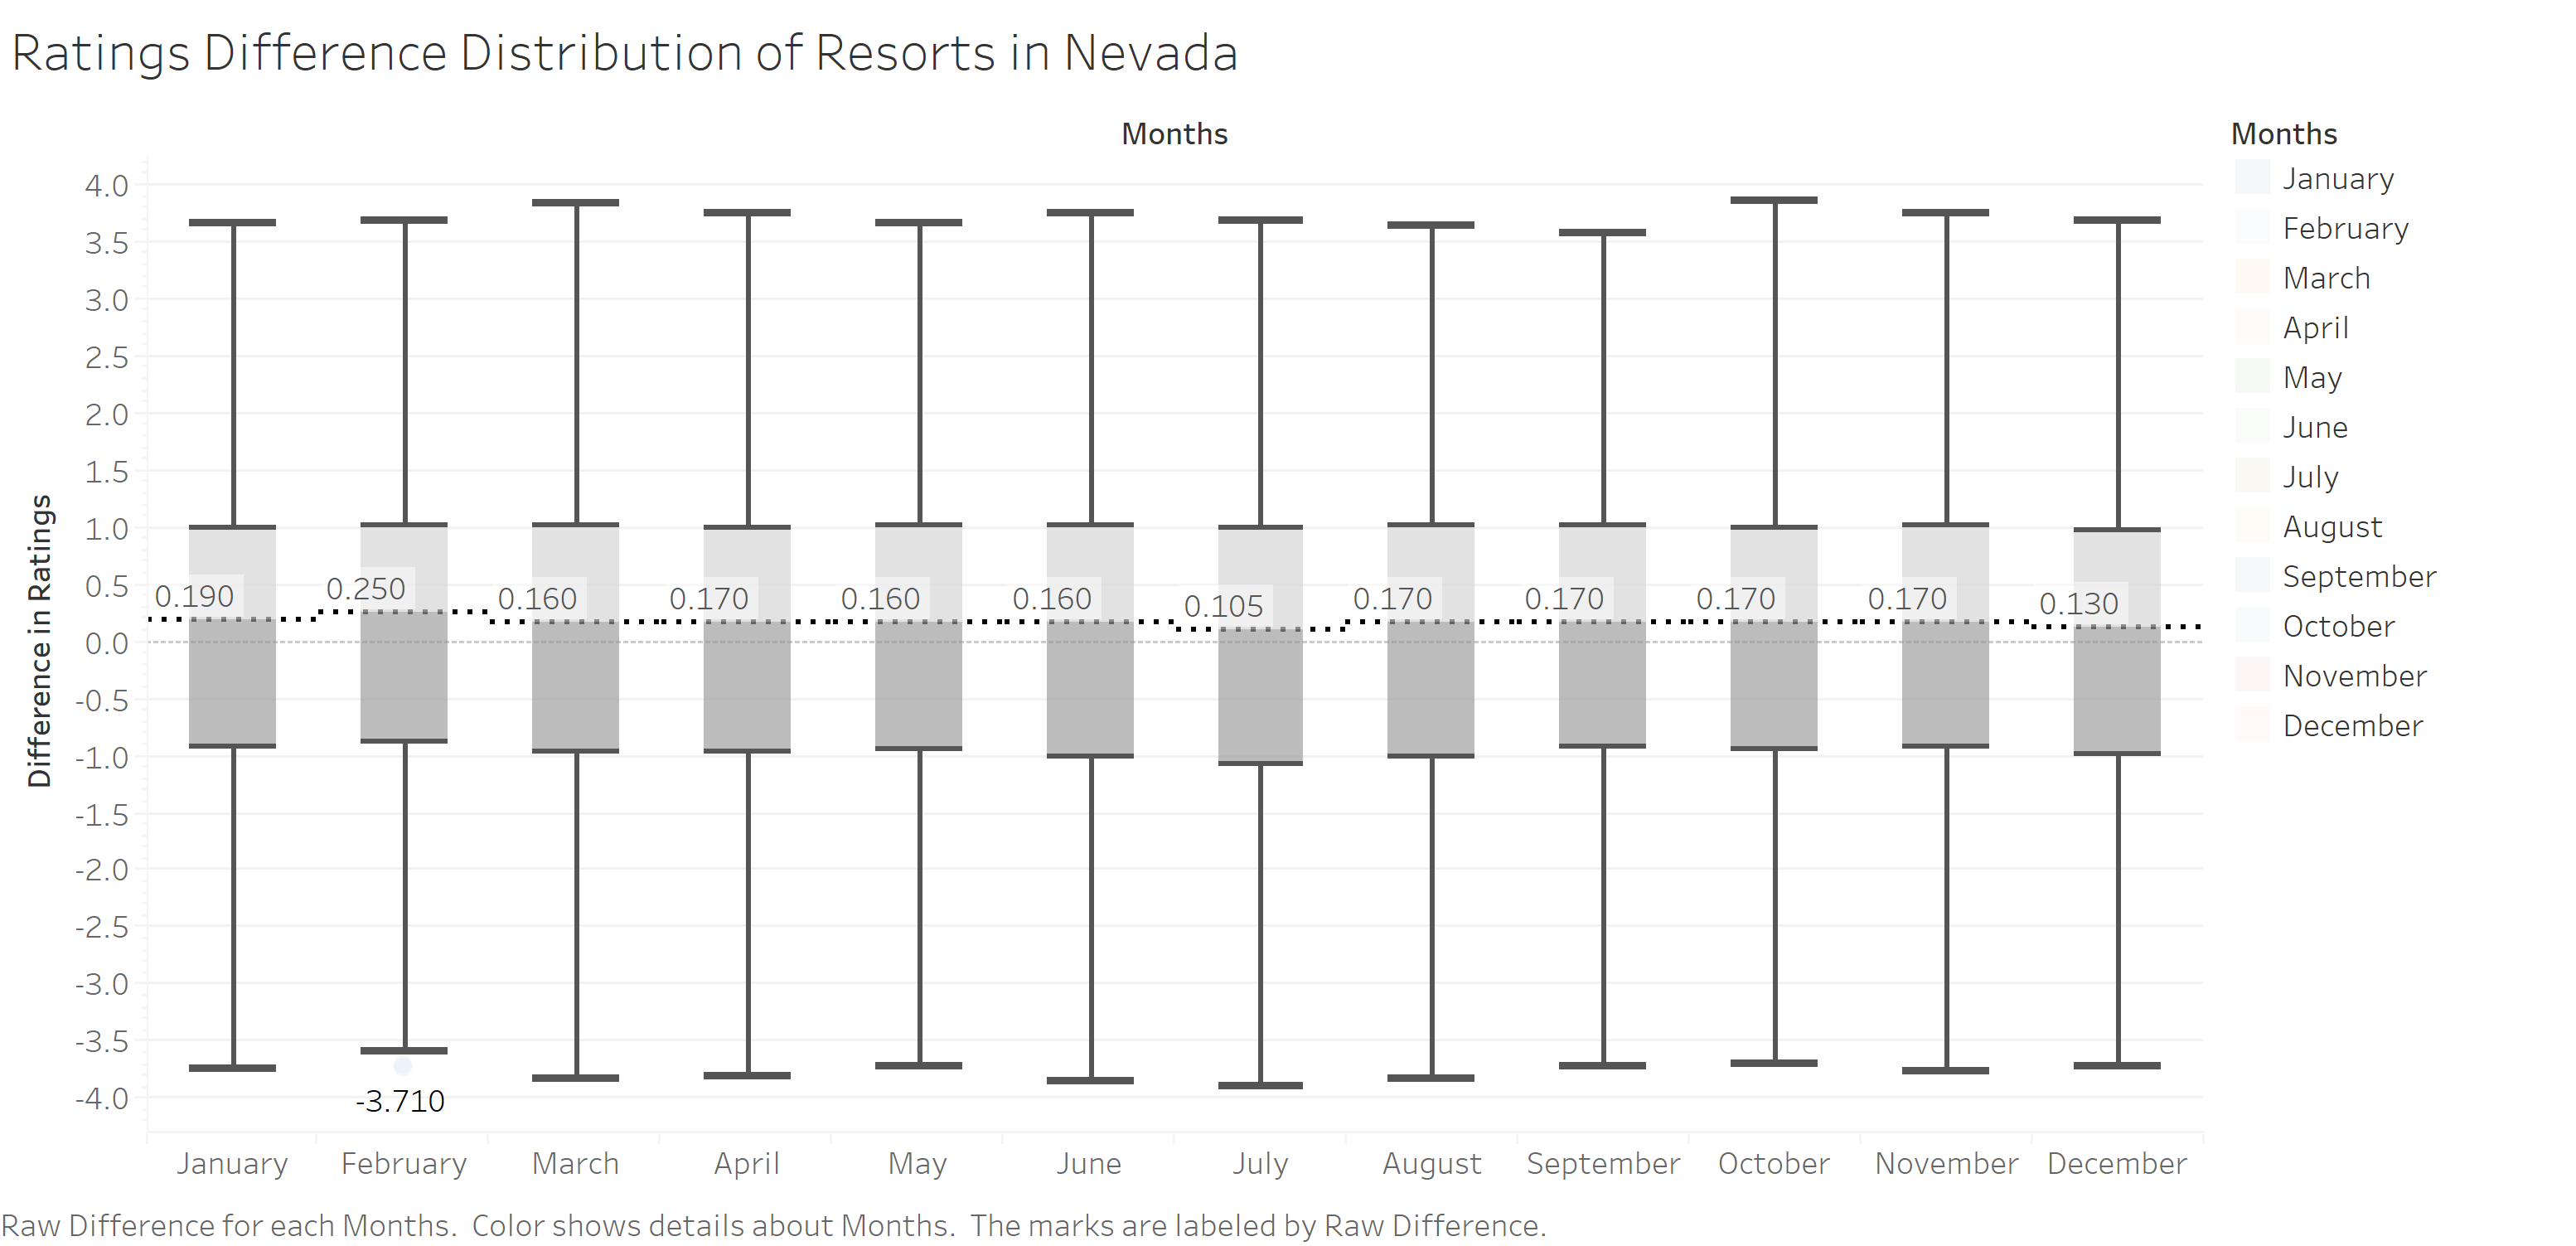

# The conclusion!

# we saw in tableau charts above that there is no seasonal rating variation in AZ for all the business combined. There is no seasonal rating variation in just the ice cream shops located in AZ. We also saw that there is no seasonal rating variation in Resorts that are in Nevada, mostly the Las Vegas area.

## We began with approach 1 to our problem of whether there is seasonal variation, and we plotted a graph for every single year and compared it to every month. The issue with this was that the graph did not tell us much except give us a yearly avg rating and monthly avg rating. We were not able to merge these graphs of all these years either.

## Our 2nd approach was to not separate it out by years, so we compared monthly avg ratings to overall avg rating. However this approach was way too aggregated.

## Our 3rd and final approach was to look at every single business and every single rating given to that business and compare whether that person rated the business higher or lower in that month and by how many points higher or lower comapred to that business avg. We were able to plot this out using Tableau.

# Some limitations we had!

## Every state has a different season at a different time. Therefore, we had to break it up by months and not seasons.
## Can not account for accuracy of rating or people that rate a restaurant high in a particular month because it’s high regarded by others. Bandwagoners.
## Don’t know which type of business category gets rated highest or lowest in certain months - we can only predict!